In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
#Need to edit below import if using base model other than DenseNet
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam, SGD
#Need to edit below import if using base model other than DenseNet
from tensorflow.keras.applications.densenet import DenseNet201

import numpy as np
import csv
import os
import random
import tensorflow as tf
import itertools
import sklearn.metrics as metrics
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
#Setting seeds so that randomization is kept consistent.
np.random.seed(70) 
random.seed(70) 
tf.random.set_seed(70)

#This is the dimensions that each image will be shaped to
#DenseNet201 requires 224 x 224.
img_height, img_width = (224,224)
#Batch size is the number of training examples utilized in one iteration. Could use 16, may increase compute time.
batch_size = 32

#These are the directories/folders where your images are stored for training, validation, and test datasets.
train_data_dir = r"dataset/train"
valid_data_dir = r"dataset/test"
test_data_dir = r"dataset/val"

#ImageDataGenerator performs image augmentation for each image on the fly. Rotating, flipping, brightness, etc.
train_datagen = ImageDataGenerator(
    width_shift_range= 0.2, # 0.2 fraction of total width/height
    height_shift_range=0.2,
    fill_mode="nearest",
    brightness_range=[0.9,1.1], #range for picking a shift value from
    rotation_range =30, #degree range for random rotations
    vertical_flip = True,
    horizontal_flip = True,
    rescale=1./255) #rescaling image pixel values by the number of channels, 1/255


#Pulls your test dataset images. Note that you only want to use 1 image at a time for test.
test_generator = train_datagen.flow_from_directory(
    test_data_dir, #same directory as training data
    target_size = (img_height, img_width),
    batch_size=1,
    class_mode= 'categorical') #set as validation data

In [3]:
models = ['ResNet50','DenseNet201', 'Xception']

metrics = []
for model in models:
  file = f'saved_models/{model}/metrics.csv'
  with open(file, 'r') as file:
      reader = csv.DictReader(file)
      y = [float(row['val_accuracy']) for row in reader]
      x = [i + 1 for i in range(len(y))]
      metrics.append((model, x, y))
      

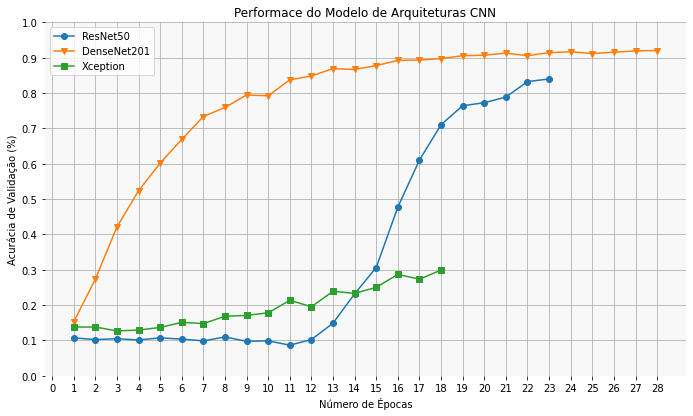

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

filled_markers = ('-o', '-v', '-s', '-X', '-*', '-^', '-<', '->', '-8', '-p', '-h', '-H', '-D', '-d', '-P')
for i, (model, x, y) in enumerate(metrics):
  plt.plot(x,y, filled_markers[i])

ax.legend([model[0] for model in metrics])

plt.xlabel('Número de Épocas')
plt.ylabel('Acurácia de Validação (%)')
plt.title("Performace do Modelo de Arquiteturas CNN")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

x_max = max([len(model[1]) for model in metrics])
ax.set_xticks(np.linspace(0,x_max,x_max+1))
ax.set_yticks(np.linspace(0,1,11))
ax.grid(visible=True)
ax.set_facecolor('#f8f8f8')
fig.set_size_inches(11.5, 6.5)

In [5]:
file_path = f'saved_models/DenseNet201/metrics.csv'
with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    loss_y = [float(row['loss']) for row in reader]
    loss_x = [i + 1 for i in range(len(loss_y))]

with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    val_loss_y = [float(row['val_loss']) for row in reader]
    val_loss_x = [i + 1 for i in range(len(val_loss_y))]

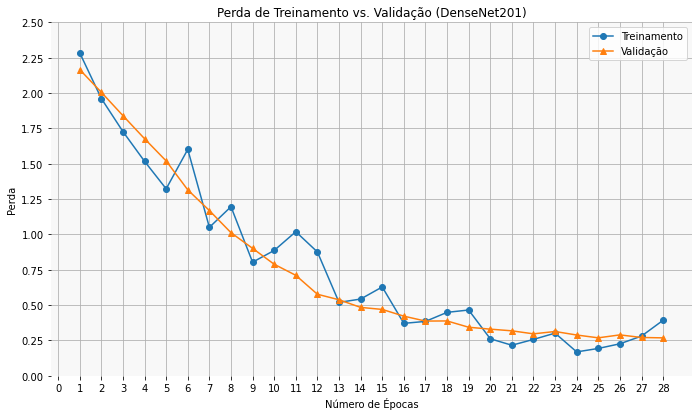

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(loss_x, loss_y, '-o')
plt.plot(val_loss_x, val_loss_y, '-^')

ax.legend(['Treinamento', 'Validação'])
plt.xlabel('Número de Épocas')
plt.ylabel('Perda')
plt.title("Perda de Treinamento vs. Validação (DenseNet201)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
x_max = max([len(model[1]) for model in metrics])
ax.set_xticks(np.linspace(0,x_max,x_max+1))
ax.set_yticks(np.linspace(0,2.5,11))
ax.grid(visible=True)
ax.set_facecolor('#f8f8f8')
fig.set_size_inches(11.5, 6.5)
fig.savefig('test2png.png', dpi=100)


In [8]:
np.random.seed(70)
random.seed(70)
tf.random.set_seed(70)

# This is the dimensions that each image will be shaped to
# DenseNet201 requires 224 x 224.
img_height, img_width = (224, 224)
# Batch size is the number of training examples utilized in one iteration. Could use 16, may increase compute time.
batch_size = 32

# These are the directories/folders where your images are stored for training, validation, and test datasets.
train_data_dir = "dataset/train"
valid_data_dir = "dataset/test"
test_data_dir = "dataset/val"

# ImageDataGenerator performs image augmentation for each image on the fly. Rotating, flipping, brightness, etc.
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,  # 0.2 fraction of total width/height
    height_shift_range=0.2,
    fill_mode="nearest",
    brightness_range=[0.9, 1.1],  # range for picking a shift value from
    rotation_range=30,  # degree range for random rotations
    vertical_flip=True,
    horizontal_flip=True,
    validation_split=0.0,
    rescale=1./255)  # rescaling image pixel values by the number of channels, 1/255

# Pulls your test dataset images. Note that you only want to use 1 image at a time for test.
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical')


models = ['ResNet50','DenseNet201', 'Xception']
tests_metrics = []
# Avalia os melhores modelos com o conjunto de teste
for model in models:
  model = keras.models.load_model(f'saved_models/{model}/best_val_acc.h5')
  test_loss, test_acc = model.evaluate(test_generator, verbose=2)
  tests_metrics.append((model, test_loss, test_acc))

Found 801 images belonging to 9 classes.
801/801 - 516s - loss: 0.5607 - accuracy: 0.8190 - 516s/epoch - 645ms/step
801/801 - 445s - loss: 0.2368 - accuracy: 0.9326 - 445s/epoch - 556ms/step
801/801 - 428s - loss: 2.0565 - accuracy: 0.3308 - 428s/epoch - 534ms/step
